# Summary

Reads a summary data file, builds a summary plot.

Format of the summary file:
1. Number of cases
1. Number of points in each case
1. Then cases themselves, each one consisting of
    * Title
    * Data points

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import io

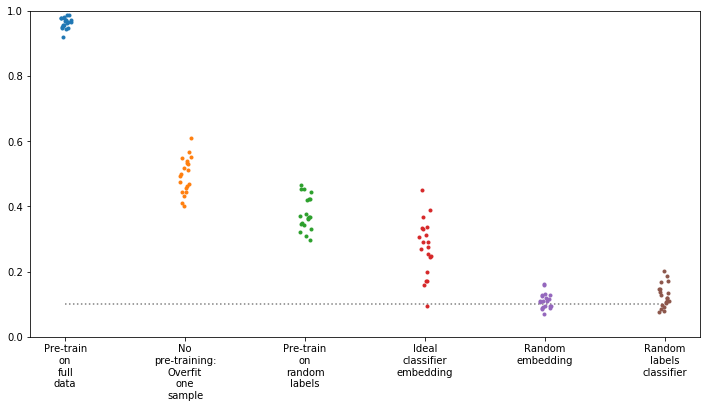

In [52]:
def make_plot(file_name):
    f = open(file_name, 'r', encoding='utf-8')
    mytext = f.readlines()

    n_cases = int(mytext.pop(0))
    n_points = int(mytext.pop(0))

    plt.figure(figsize=(12,6));
    plt.plot([0, n_cases-1], [0.1, 0.1], ':', color='gray');
    titles = []
    jitter_w = 0.1
    for i in range(n_cases):
        title = mytext.pop(0)
        title = title.replace(' ','\n')
        titles.append(title)
        data = []
        for j in range(n_points):
            data.append(float(mytext.pop(0)))
        plt.plot(np.ones((n_points,1))*i + np.random.uniform(size=(n_points,1))*jitter_w - jitter_w/2, data, '.')
    plt.xticks(range(n_cases), labels=titles);
    plt.ylim(0, 1);
    
make_plot("data.txt")

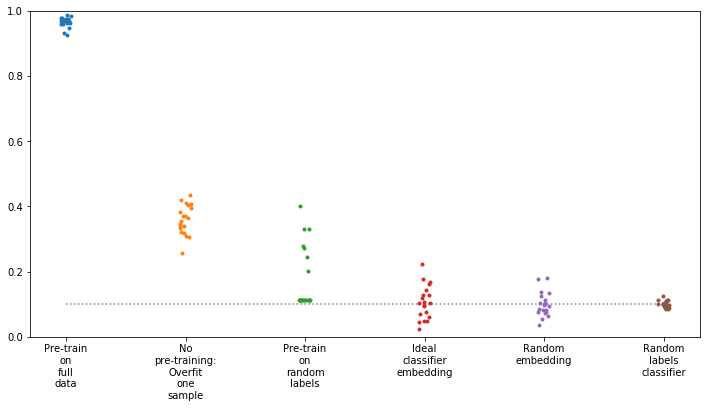

In [53]:
make_plot("data_10.txt")

As we can see, forcing the model to project to a space of 10 (as opposed to 64) actually hurts a lot. All sorts of pre-training become useless. It may be however because the expressiveness of the model is now lower (it doesn't create 64 different features to later project them to a space of 10, it does additive projection to the space of 10 right away).

Maybe it makes sense to repeat it with a strictly-larger model (→64→10, instead of a simple →10).

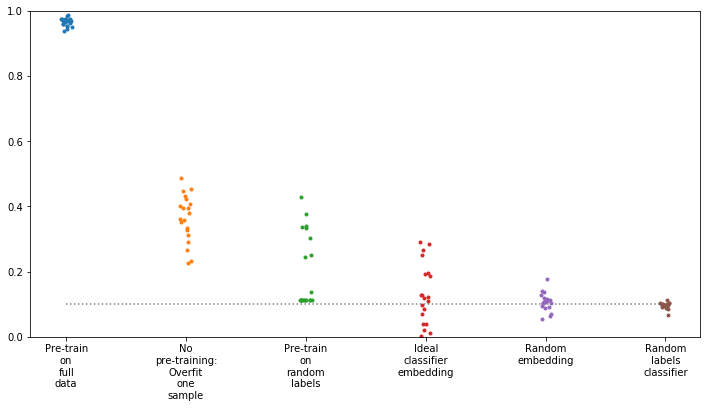

In [56]:
make_plot("data_6410.txt")